In [15]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import moviepy.editor as mp
import librosa
import librosa.display
from scipy import fftpack
import scipy.signal as sig
from scipy.ndimage import gaussian_filter1d

<b>Activation command</b>

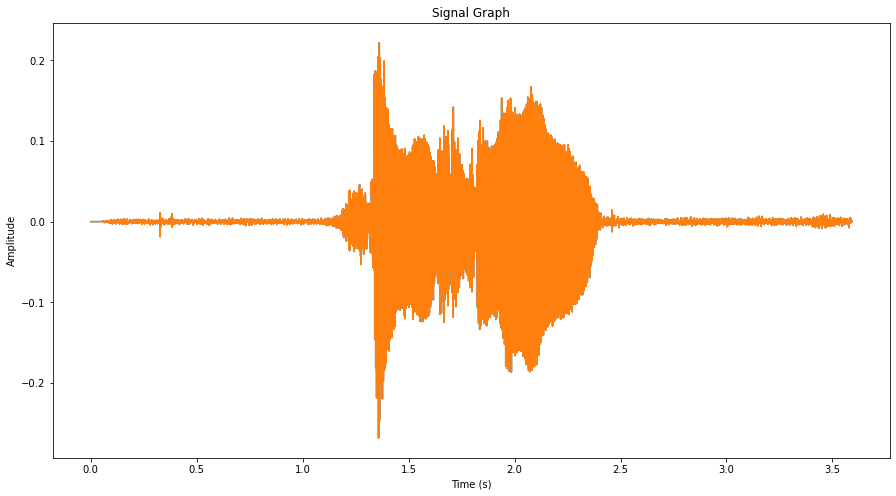

In [95]:

# set parameters
filename = "testing1.mp4"

# read audio file
audio = mp.AudioFileClip(filename)

# extract audio data and sample rate
signals = audio.to_soundarray()
samplerate = audio.fps

# calculate signal duration in seconds
duration = len(signals) / samplerate

# create time vector
time = np.array([float(i)/samplerate for i in range(len(signals))])

# plot signal graph
plt.figure(figsize = (15,8))
plt.plot(time, signals)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal Graph')

plt.show()


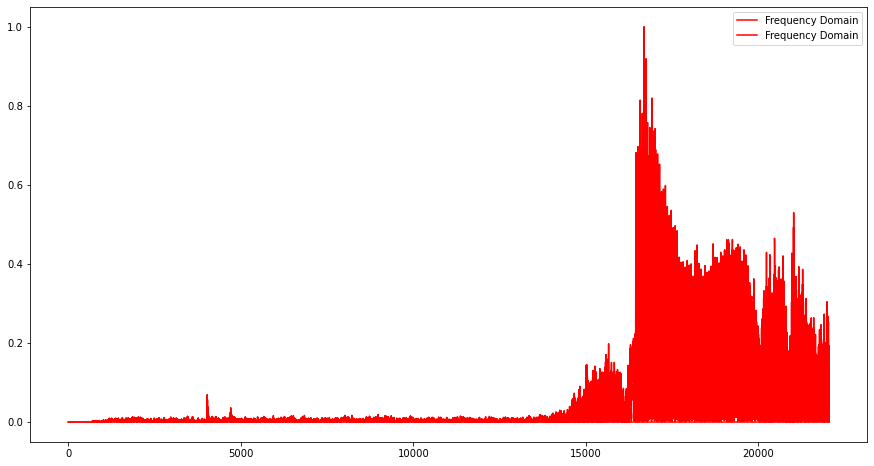

In [96]:

X = fftpack.fft(signals)
freq = fftpack.fftfreq(len(X)) * samplerate

X = X[freq>0]
freq = freq[freq >0]

# Normalize the signals
X = X / np.max(np.abs(X))

plt.figure(figsize = (15,8))
plt.plot(freq, np.abs(X), color='red', label='Frequency Domain')
plt.legend()


<b>filtering</b>

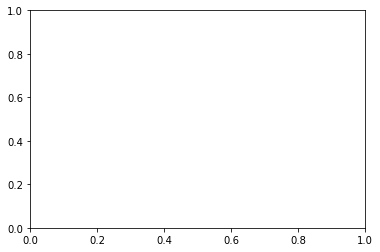

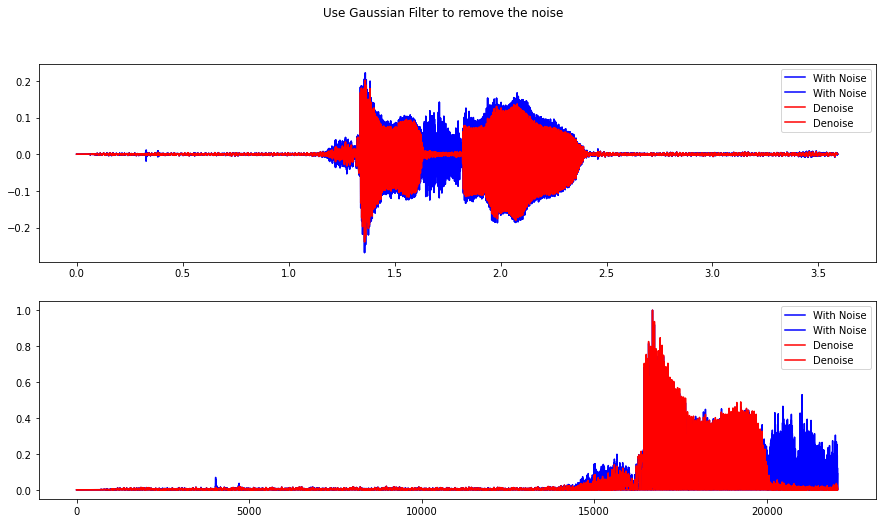

In [100]:

from scipy.ndimage import gaussian_filter
# Use Gaussian Filter to remove the noise
x_filtered = gaussian_filter(signals, 5)

# Compute the FFT of the signals
X_filtered = fftpack.fft(x_filtered)
# Compute the frequency domain
freq_filtered = fftpack.fftfreq(len(X_filtered)) * samplerate

# Convert the frequency domain to positive side and below 50Hz
X_filtered = X_filtered[freq_filtered > 0]
freq_filtered = freq_filtered[freq_filtered > 0]


# Normalize the signals
X_filtered = X_filtered / np.max(np.abs(X_filtered))
plt.gca()
# Plot the signals in frequency domain
fig, (ax1, ax2) = plt.subplots(2, figsize=(15,8))
fig.suptitle('Use Gaussian Filter to remove the noise')
ax1.plot(time, signals, color='blue', label='With Noise')
ax1.plot(time, x_filtered, color='red', label='Denoise')
ax1.legend()
ax2.plot(freq, np.abs(X), color='blue', label='With Noise')
ax2.plot(freq_filtered, np.abs(X_filtered), color='red', label='Denoise')
ax2.legend()

In [44]:
wavfile.write("/Users/admin/Downloads/filtered.mp3", samplerate,x_filtered)

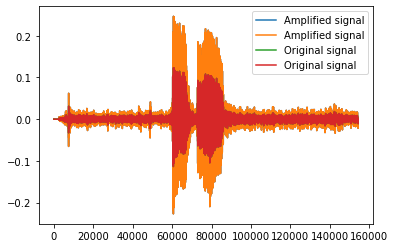

In [46]:
import numpy as np
import matplotlib.pyplot as plt


# Calculate the RMS value of the signal and the ambient noise
signal_rms = np.sqrt(np.mean(x_filtered**2))
ambient_rms = signal_rms / 0.5  # example value, adjust as needed

# Calculate the gain required to increase the signal amplitude without increasing the ambient noise amplitude
gain = ambient_rms / signal_rms

# Apply the gain to the signal
amplified_signal = x_filtered * gain
plt.gca()
# Plot the original signal and the amplified signal for comparison
plt.plot(amplified_signal, label='Amplified signal')
plt.plot(x_filtered, label='Original signal')

plt.legend()
plt.show()


In [47]:
wavfile.write("/Users/admin/Downloads/amp.mp3", samplerate,amplified_signal)

In [101]:
signalx = np.array([arr[0] for arr in signals])

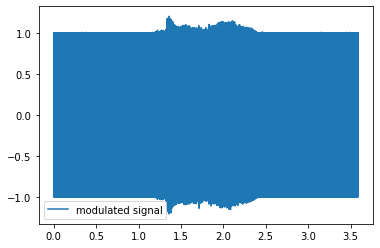

In [102]:
import numpy as np
import scipy.signal as signal

# Define the carrier frequency and modulation frequency
carrier_freq = 50000 # Hz
modulating_freq = 16000 # Hz

carrier_signal = np.sin(2 * np.pi * carrier_freq * time)

# Combine the carrier and modulating signals using AM modulation
modulated_signal = (1 + signalx) * carrier_signal

# Amplify the modulated signal to a suitable level for transmission
amplified_signal = 10 * modulated_signal

# Transmit the signal using an ultrasonic transducer
# (code to control the transducer will depend on the specific hardware used)

# Demodulate the received signal to recover the original modulating signal
demodulated_signal = signal.detrend(signal.hilbert(amplified_signal))
#demodulated_signal = np.abs(demodulated_signal)
# Plot the original modulating signal and the demodulated signal
import matplotlib.pyplot as plt
#plt.plot(time, signalx, label='Modulating signal')
plt.plot(time, modulated_signal, label='modulated signal')
plt.legend()
plt.show()


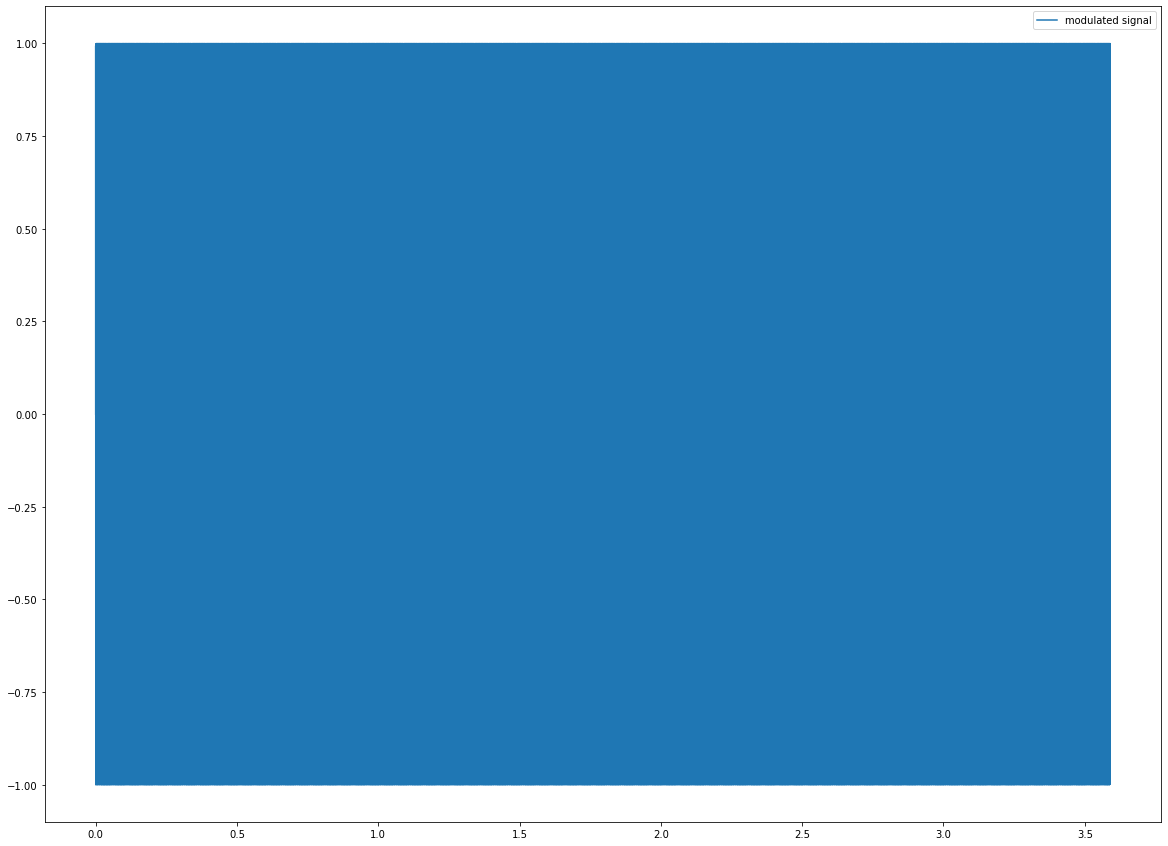

In [103]:
plt.figure(figsize=(20,15))
plt.plot(time, carrier_signal, label='Ultrasonic signal')
plt.legend()
plt.show()

In [69]:
wavfile.write("/Users/admin/Downloads/mod.mp3", samplerate,modulated_signal)

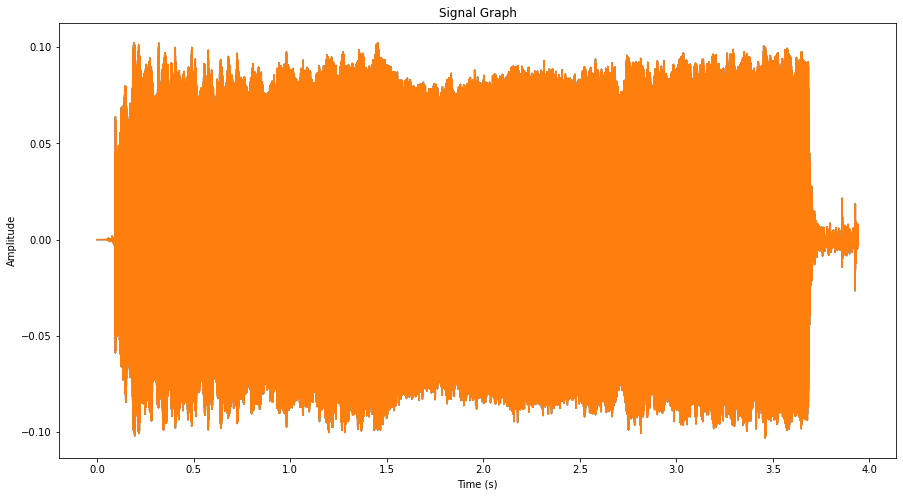

In [72]:
#analyze transmitted signal
# set parameters
filename = "recieved.mp4"

# read audio file
raudio = mp.AudioFileClip(filename)

# extract audio data and sample rate
rsignals = raudio.to_soundarray()
rsamplerate = raudio.fps

# calculate signal duration in seconds
rduration = len(rsignals) / rsamplerate

# create time vector
rtime = np.array([float(i)/rsamplerate for i in range(len(rsignals))])

# plot signal graph
plt.figure(figsize = (15,8))
plt.plot(rtime, rsignals)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal Graph')

plt.show()


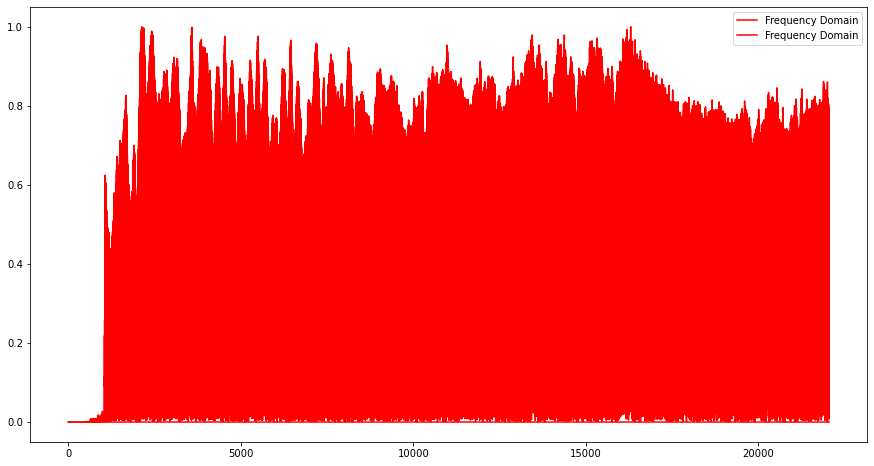

In [73]:

rX = fftpack.fft(rsignals)
rfreq = fftpack.fftfreq(len(rX)) * rsamplerate

rX = rX[rfreq>0]
rfreq = rfreq[rfreq >0]

# Normalize the signals
rX = rX / np.max(np.abs(rX))

plt.figure(figsize = (15,8))
plt.plot(rfreq, np.abs(rX), color='red', label='Frequency Domain')
plt.legend()


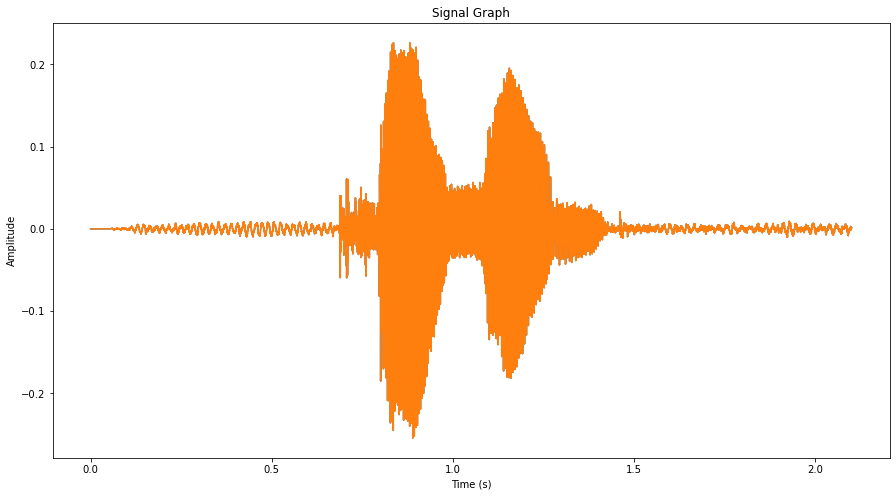

In [74]:
#command signal
# set parameters
filename = "call.mp4"

# read audio file
caudio = mp.AudioFileClip(filename)

# extract audio data and sample rate
csignals = caudio.to_soundarray()
csamplerate = caudio.fps

# calculate signal duration in seconds
cduration = len(csignals) / csamplerate

# create time vector
ctime = np.array([float(i)/csamplerate for i in range(len(csignals))])

# plot signal graph
plt.figure(figsize = (15,8))
plt.plot(ctime, csignals)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Signal Graph')

plt.show()


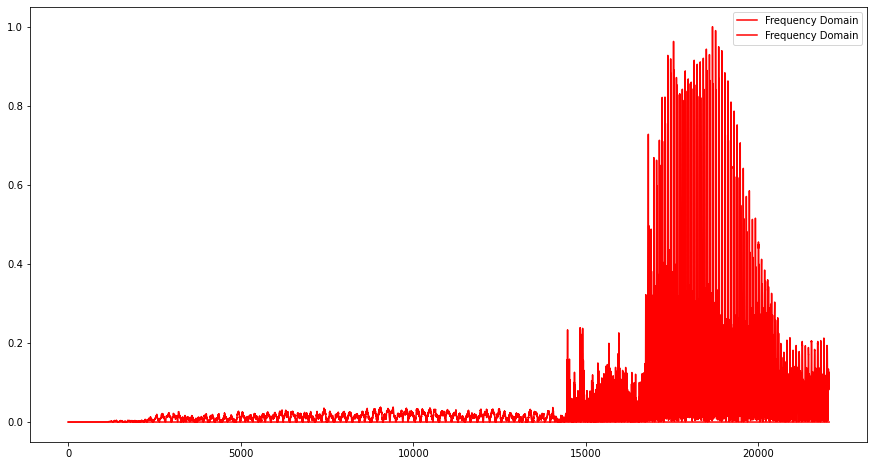

In [76]:

cX = fftpack.fft(csignals)
cfreq = fftpack.fftfreq(len(cX)) * csamplerate

cX = cX[cfreq>0]
cfreq = cfreq[cfreq >0]

# Normalize the signals
cX = cX / np.max(np.abs(cX))

plt.figure(figsize = (15,8))
plt.plot(cfreq, np.abs(cX), color='red', label='Frequency Domain')
plt.legend()


In [77]:
csignalx = np.array([arr[0] for arr in csignals])

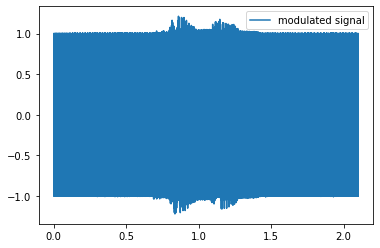

In [89]:
import numpy as np
import scipy.signal as signal

# Define the carrier frequency and modulation frequency
carrier_freq = 1000 # Hz
modulating_freq = 17000 # Hz

carrier_signal = np.sin(2 * np.pi * carrier_freq * ctime)

# Combine the carrier and modulating signals using AM modulation
cmodulated_signal = (1 + csignalx) * carrier_signal

# Amplify the modulated signal to a suitable level for transmission
camplified_signal = 10 * modulated_signal

# Transmit the signal using an ultrasonic transducer
# (code to control the transducer will depend on the specific hardware used)

# Demodulate the received signal to recover the original modulating signal
demodulated_signal = signal.detrend(signal.hilbert(amplified_signal))
#demodulated_signal = np.abs(demodulated_signal)
# Plot the original modulating signal and the demodulated signal
import matplotlib.pyplot as plt
#plt.plot(time, signalx, label='Modulating signal')
plt.plot(ctime, cmodulated_signal, label='modulated signal')
plt.legend()
plt.show()


In [90]:
wavfile.write("/Users/admin/Downloads/cmod.mp3", samplerate,cmodulated_signal)